# Introduction to Machine Learning

This jupyter notebook with contain the code snippets for the Introduction to Python and Machine Learning workshop presented by Nima Mahmoudi in Mar 2019. This tutorial is based on the [This Blog Post](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/).

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.16.2
matplotlib: 3.0.3
pandas: 0.24.1
sklearn: 0.20.3


# Load The Dataset

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [4]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [5]:
dataset.head(7)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


# Summarize the Dataset

## Dimensions of the dataset

In [6]:
# shape
print(dataset.shape)

(150, 5)


## Peek at the data

In [6]:
# head
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Statistical Summary

In [7]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Data Visualization

## Univariate plots

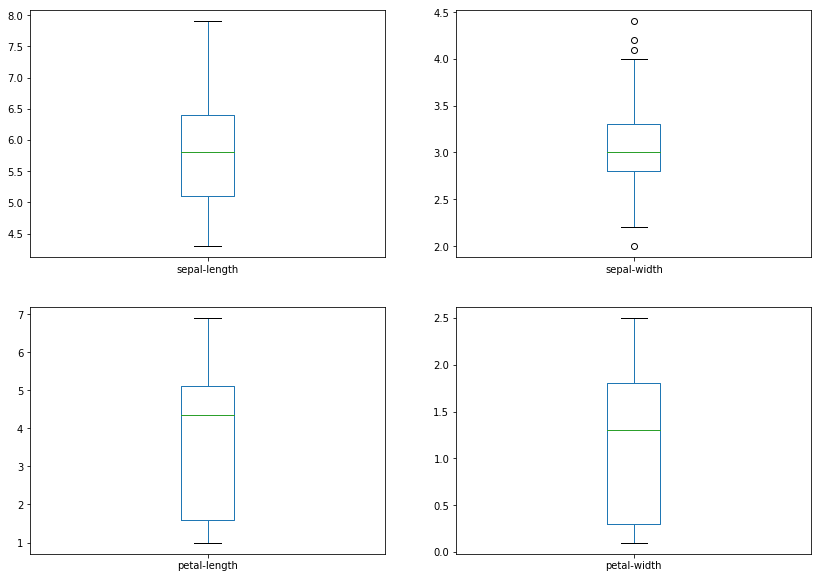

In [9]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(14,10))
plt.show()

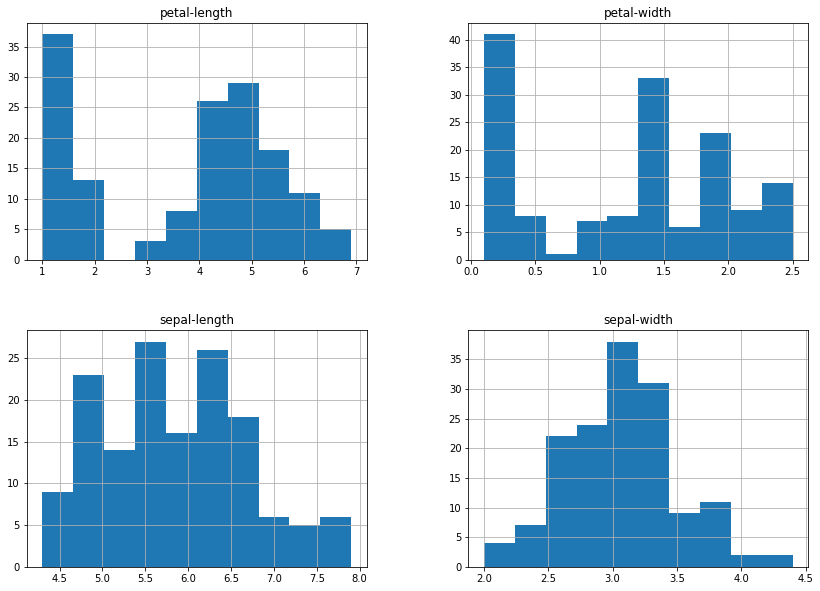

In [10]:
# histograms
dataset.hist(figsize=(14,10))
plt.show()

## Multivariate Plots

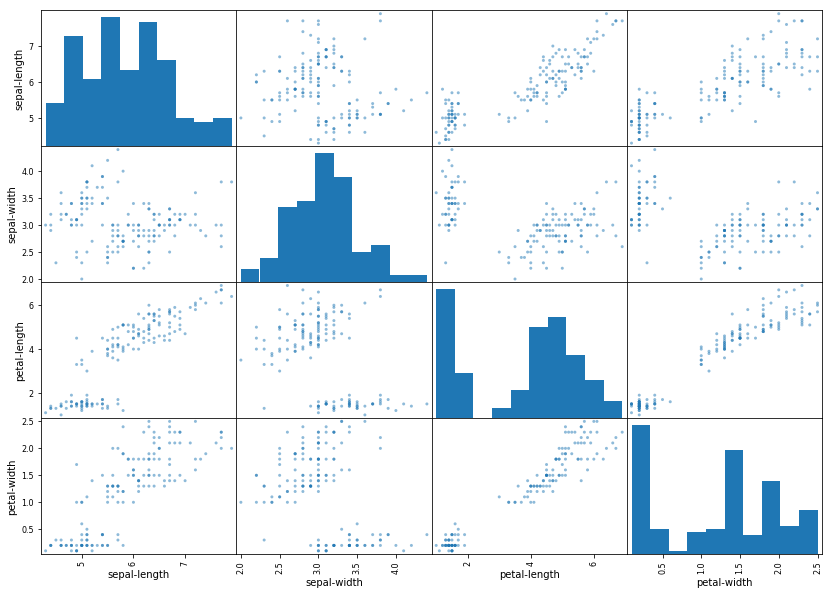

In [11]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(14,10))
plt.show()

# Evaluate Algorithms

## Create a test set

In [11]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.3
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                    Y, 
                                                    test_size=validation_size,
                                                    random_state=seed)
 

In [13]:
X_train.shape

(105, 4)

In [14]:
X_test.shape

(45, 4)

## Build Models

In [15]:
# Test options and evaluation metric
seed = 7

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    # Fit the model to the training set
    model.fit(X_train, y_train)

    # Measure model performance on the test set
    score = model.score(X_test, y_test)
    results.append(score)
    names.append(name)
    msg = "%s: %f" % (name, score)
    print(msg)

LR: 0.888889
LDA: 0.977778
KNN: 0.911111
CART: 0.866667
NB: 0.888889
SVM: 0.955556


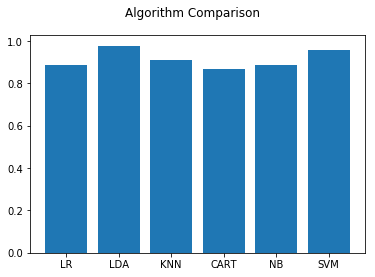

In [16]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
plt.bar(names, results)
plt.show()

## Selecting the Best Model

In [17]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predictions = lda.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9777777777777777
[[12  0  0]
 [ 0 15  1]
 [ 0  0 17]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.94      1.00      0.97        17

      micro avg       0.98      0.98      0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

